In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# training data set
X,y = make_regression(n_samples=300, n_features=1, n_informative=1, n_targets=1,noise=25,random_state=13)

In [3]:
#split data to training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)

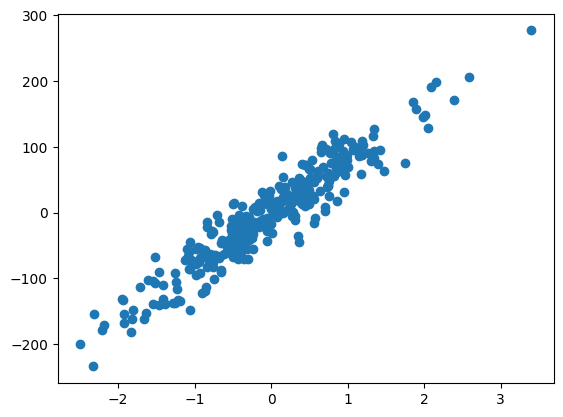

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)
y_pred = lr.predict(X_test)

[79.61975374]
0.7707406662961533


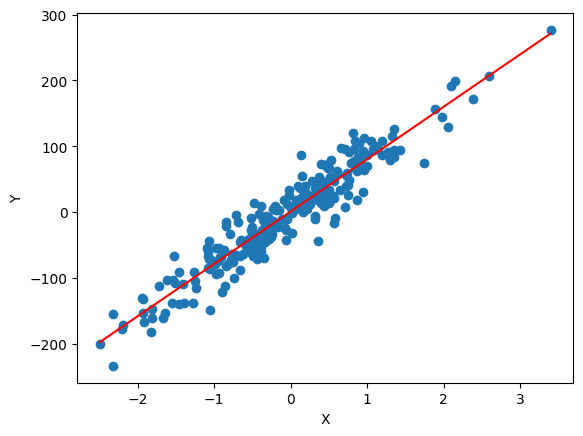

In [6]:
plt.scatter(X_train,y_train)
X_plt = X_train.ravel()
y = lr.coef_*X_plt+lr.intercept_
idx = np.argsort(X_plt)
plt.plot(X_plt[idx],y[idx],color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8365516323687316

# Gradient descent from scratch 

In [8]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        # initializing slope m and intercept b
        # defining epochs and learning rate
        self.m =  10
        self.b = -30
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        for i in range(self.epochs):
            # converts to 1d data
            X = X.ravel()
            # calculate the Loss function slope with respect to m and b
            loss_slope_m = -2 * np.sum( (y - self.m * X - self.b )*X)
            loss_slope_b  = - 2 * np.sum( y -  self.m * X - self.b )

            # updating the m and b with each epochs
            # slope is multiplied by learning rate to reduce extreme change in m and b
            self.m = self.m - (self.lr*loss_slope_m)
            self.b = self.b- ( self.lr * loss_slope_b )
        print(self.m,"  ",self.b)

    def predict(self,X):
        return self.m*X+self.b

# Fit the data with different learning rate and epochs

In [9]:
GDRegressor(0.01,30).fit(X_train,y_train)

-1.293658004496149e+19    1.805693554121945e+19


In [10]:
GDRegressor(0.01,100).fit(X_train,y_train)

-3.409835318316345e+61    4.895227299344342e+61


In [11]:
GDRegressor(0.01,300).fit(X_train,y_train)

-5.737657332277508e+182    8.237095023658394e+182


In [12]:
GDRegressor(0.01,500).fit(X_train,y_train)

-9.654634069205461e+303    1.386038476005118e+304


In [13]:
GDRegressor(0.001,30).fit(X_train,y_train)

79.61975097645825    0.7707387545602321


In [14]:
GDRegressor(0.001,100).fit(X_train,y_train)

79.61975373987235    0.7707406662961479


In [15]:
GDRegressor(0.001,20).fit(X_train,y_train)

79.6189715936631    0.7702103826184362


In [16]:
GDRegressor(0.001,15).fit(X_train,y_train)

79.60652576230223    0.7620094378700745


In [17]:
gd = GDRegressor(0.001,14)
gd.fit(X_train,y_train)

79.59644690075999    0.7554790978032672


## From above result we can observe few things.
Without appropriate **learning rate** even  increasing number epochs doesnot gives the optimal solution <br>
Appropriate learning rate gradient descent finds solution with few **epochs**


In [18]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.836605292521799

## We get the same r2score as the sklearn model

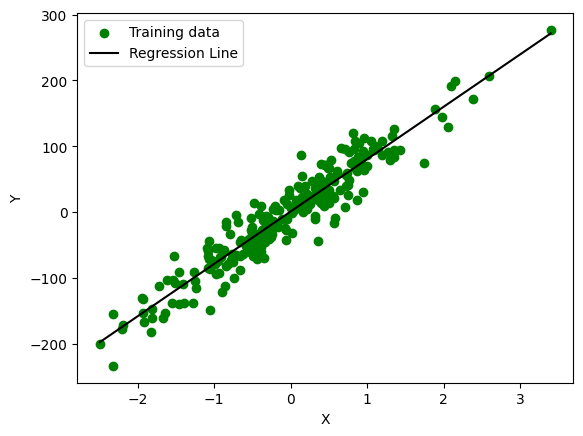

In [19]:

plt.scatter(X_train,y_train,color='green',label='Training data')
X_plt = X_train.ravel()
y = lr.coef_*X_plt+lr.intercept_
idx = np.argsort(X_plt)
plt.plot(X_plt[idx],y[idx],color='black',label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In this page we fitted the line using gradient descent. we checked how learning rate and epochs effects the line.